# Paris - City of Light
## Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## I. Introduction: Business Problem <a name="introduction"></a>

In this project we will try to help the **Mayor of Paris** and his colleagues nearby Paris to adjust the **City policies** in order to encourage **social diversity** and to increase the **attractiveness of the neighborhoods**.

Paris is a tremendous city of 2 million inhabitants, with a very rich offer of culture, history but also gastronomy and nature. Around, the "Ile de France" region is the biggest european region in terms of population and GDP. Real estate is quite expensive, and there are important discrepancies among the 20 Paris districts ("Arrondissements") and the cities which are very close to Paris.

Our project will focus on East Paris (10 arrondissements) and 10 surrounding cities close to East Paris. Data collection and interpretation will focus on two distinct parts:
- first, we will examine the **real estate** price per "Arrondissement" or city, based on the available public data of Real Estate transactions. We will calculate the average price per square meter per city.
- second, we will find the most **popular venues** and segment the neighborhoods according to the typology of their venues. Of course, Foursquera will be used to collect the associated data.

Once we have the Real Estate prices associated to each Quartier and the Venues profile, we will try to find a **correlation** between the two types of data and describe what is the **venue segment associated with a "expensive", "medium" and "low price" neighborhood**.

We will than use then our data science powers to make some recommendation for the Mayor in order to adjust the City Policies. Particularly, we will try to find **what kind of venues** should be encouraged in order to increase the **attractiveness of the low price neighborhoods**.

## II. Data <a name="data"></a>

https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/

https://www.data.gouv.fr/fr/datasets/les-communes-d-ile-de-france-idf/




Import necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Foursquera

In [2]:
# @hidden_cell
CLIENT_ID = 'WRGTBGWVIWD1S0LLK0GRGEARWM2GBYEQ1QOP0PSIPNBJHOUT' # your Foursquare ID
CLIENT_SECRET = 'VALOPUUYGGEAIWKNIW5WVQRIIGYRO2EZJ0LOTKT1JDXXECKF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [9]:
latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of East Paris
paris_east_map

Mark on the map the boundaries of the cities and "Arrondissements" nearby East Paris.

Use for this the site https://france-geojson.gregoiredavid.fr

In [6]:
!wget --quiet https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson -O communes-ile-de-france.geojson
    
print('GeoJSON file downloaded!')

#communes_ile_de_france = 'Communes_IDF.json'

communes_ile_de_france = r'communes-ile-de-france.geojson'

print(communes_ile_de_france)

folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

paris_east_map

GeoJSON file downloaded!
communes-ile-de-france.geojson


<img src = "https://github.com/paulpreda/coursera_capstone/blob/master/Paris_East.PNG" width = 1200>

I have uploaded into the IBM cloud the files corresponding to the real estate sales in 2018 in 3 departments from Ile de France:
    - 75 - Paris
    - 93 - Seine Saint Denis
    - 94 - Val de Marne

They correspond to teh Paris East Region we want to study.

The hidden code below import brute data into 3 pandas Dataframes

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5fa043401dd344ca9d75c1ec1d1d6b13 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fx7y0OF-K29wdDIUzSU6dWi1ypY9vEBzw251_M_qvcaE',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='75_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='93_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='94_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,17,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's concatenate these data into a sigle dataframe which we will call **restate_primary_data**. How many lines do we have?

In [5]:
df_list = [df_data_1, df_data_2, df_data_3]
restate_primary_data = pd.concat(df_list)

restate_primary_data.shape

(156424, 40)

In [6]:
restate_primary_data.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2018-1276175,2018-01-04,1,Vente,1202000.0,10.0,NaN,AV PERCIER,7250,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000CJ0003,NaN,NaN,77,159.2,78,NaN,79.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,120.0,2.0,NaN,NaN,NaN,NaN,NaN,2.315005,48.874705
1,2018-1276176,2018-01-09,1,Vente,130000.0,20.0,NaN,RUE SAINT CLAUDE,8520,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0072,NaN,NaN,206,NaN,213,NaN,214.0,NaN,216.0,NaN,NaN,NaN,4,2.0,Appartement,22.0,1.0,NaN,NaN,NaN,NaN,NaN,2.365335,48.860248
2,2018-1276177,2018-01-05,1,Vente,51000.0,24.0,NaN,RUE TREILHARD,9429,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000CI0004,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.313122,48.877067
3,2018-1276177,2018-01-05,1,Vente,51000.0,24.0,NaN,RUE TREILHARD,9429,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000CI0004,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.313122,48.877067
4,2018-1276178,2018-01-03,1,Vente,15000.0,12.0,NaN,RUE VOLTA,9905,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AE0136,NaN,NaN,7,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.357140,48.864804


In [7]:
restate_primary_data = restate_primary_data[['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation', 'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie', 'code_postal', 'nom_commune', 'type_local', 'surface_reelle_bati', 'longitude', 'latitude']]
restate_primary_data.shape

(156424, 13)

In [8]:
restate_primary_data[['numero_disposition']] = 1
restate_primary_data.replace({'adresse_numero': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'adresse_numero': 'int64'}, copy=False)
restate_primary_data.replace({'code_postal': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'code_postal': 'int64'}, copy=False)
restate_primary_data.replace({'surface_reelle_bati': np.NaN}, value=0, inplace=True)
restate_primary_data.head(20)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,longitude,latitude
0,2018-1276175,2018-01-04,1,Vente,1202000.0,10,AV PERCIER,75008,Paris 8e Arrondissement,Appartement,120.0,2.315005,48.874705
1,2018-1276176,2018-01-09,1,Vente,130000.0,20,RUE SAINT CLAUDE,75003,Paris 3e Arrondissement,Appartement,22.0,2.365335,48.860248
2,2018-1276177,2018-01-05,1,Vente,51000.0,24,RUE TREILHARD,75008,Paris 8e Arrondissement,Dépendance,0.0,2.313122,48.877067
3,2018-1276177,2018-01-05,1,Vente,51000.0,24,RUE TREILHARD,75008,Paris 8e Arrondissement,Dépendance,0.0,2.313122,48.877067
4,2018-1276178,2018-01-03,1,Vente,15000.0,12,RUE VOLTA,75003,Paris 3e Arrondissement,Appartement,9.0,2.357140,48.864804
5,2018-1276179,2018-01-03,1,Vente,650000.0,174,BD HAUSSMANN,75008,Paris 8e Arrondissement,Appartement,96.0,2.307897,48.875379
6,2018-1276180,2018-01-05,1,Vente,3000.0,187,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,Appartement,58.0,2.304125,48.875332
7,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408
8,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408
9,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Appartement,180.0,2.353682,48.866408


In [9]:
restate_primary_data.dtypes

id_mutation             object
date_mutation           object
numero_disposition       int64
nature_mutation         object
valeur_fonciere        float64
adresse_numero           int64
adresse_nom_voie        object
code_postal              int64
nom_commune             object
type_local              object
surface_reelle_bati    float64
longitude              float64
latitude               float64
dtype: object

In [10]:
restate_primary_data.groupby(['code_postal'])['nom_commune'].value_counts()

code_postal  nom_commune             
0            Noisy-le-Grand               427
             Créteil                      313
             Bagnolet                     278
             Neuilly-sur-Marne            256
             Livry-Gargan                 218
             Le Perreux-sur-Marne         177
             Bobigny                      168
             Paris 14e Arrondissement     165
             Nogent-sur-Marne             133
             Romainville                  123
             Paris 13e Arrondissement     118
             Drancy                        99
             Villiers-sur-Marne            89
             Joinville-le-Pont             87
             Aubervilliers                 82
             Villejuif                     69
             Paris 12e Arrondissement      66
             Paris 19e Arrondissement      59
             Noisy-le-Sec                  58
             Choisy-le-Roi                 57
             Boissy-Saint-Léger           

Here below is the list of zip codes for the Arrondissements and Cities we would like to study.

We will include the data for these cities into a new dataframe called **df_east_paris_primary**

In [14]:
city_list = [75003, 75004, 75005, 75010, 75011, 75012, 75013, 75018, 75019, 75020, 93100, 93110, 93170, 93230, 93260, 93310, 93500, 94120, 94130, 94160, 94220, 94300, 94340, 94410]

for code_city in city_list:
    if code_city == 75003:
        df_east_paris_primary = restate_primary_data.loc[restate_primary_data['code_postal'] == code_city]
    else:
        df_east_paris_primary = df_east_paris_primary.append(restate_primary_data.loc[restate_primary_data['code_postal'] == code_city])

df_east_paris_primary.shape

(55786, 13)

In [15]:
df_east_paris_primary.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,longitude,latitude
1,2018-1276176,2018-01-09,1,Vente,130000.0,20,RUE SAINT CLAUDE,75003,Paris 3e Arrondissement,Appartement,22.0,2.365335,48.860248
4,2018-1276178,2018-01-03,1,Vente,15000.0,12,RUE VOLTA,75003,Paris 3e Arrondissement,Appartement,9.0,2.357140,48.864804
7,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408
8,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408
9,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Appartement,180.0,2.353682,48.866408
28,2018-1276190,2018-01-11,1,Vente,399500.0,26,RUE DE POITOU,75003,Paris 3e Arrondissement,Appartement,48.0,2.362722,48.861726
33,2018-1276195,2018-01-08,1,Vente,234000.0,129,RUE DU TEMPLE,75003,Paris 3e Arrondissement,Appartement,17.0,2.358150,48.863513
40,2018-1276201,2018-01-12,1,Vente,77000.0,7,RUE CHAPON,75003,Paris 3e Arrondissement,Appartement,68.0,2.356991,48.862998
45,2018-1276204,2018-01-08,1,Vente,365000.0,30,RUE BEAUBOURG,75003,Paris 3e Arrondissement,Appartement,14.0,2.354479,48.861846
46,2018-1276204,2018-01-08,1,Vente,365000.0,30,RUE BEAUBOURG,75003,Paris 3e Arrondissement,Appartement,20.0,2.354479,48.861846


In [17]:
df_east_paris_primary.reset_index(drop=True, inplace=True)
df_east_paris_primary.groupby(['code_postal'])['nom_commune'].value_counts()

code_postal  nom_commune             
75003        Paris 3e Arrondissement     1347
75004        Paris 4e Arrondissement     1378
75005        Paris 5e Arrondissement     1383
75010        Paris 10e Arrondissement    3254
75011        Paris 11e Arrondissement    4832
75012        Paris 12e Arrondissement    3703
75013        Paris 13e Arrondissement    2883
75018        Paris 18e Arrondissement    6245
75019        Paris 19e Arrondissement    5134
75020        Paris 20e Arrondissement    3658
93100        Montreuil                   2693
93110        Rosny-sous-Bois             1813
93170        Bagnolet                     984
93230        Romainville                 5685
93260        Les Lilas                   1011
93310        Le Pré-Saint-Gervais         495
93500        Pantin                      1650
94120        Fontenay-sous-Bois          1630
94130        Nogent-sur-Marne            1342
94160        Saint-Mandé                  869
94220        Charenton-le-Pont            

In [18]:
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()

numero_disposition  nature_mutation                   
1                   Vente                                 50583
                    Vente en l'état futur d'achèvement     4542
                    Echange                                 382
                    Adjudication                            181
                    Vente terrain à bâtir                    81
                    Expropriation                            17
Name: nature_mutation, dtype: int64

In [19]:
df_east_paris_primary.groupby(['numero_disposition'])['type_local'].value_counts()

numero_disposition  type_local                              
1                   Appartement                                 33133
                    Dépendance                                  12819
                    Local industriel. commercial ou assimilé     3842
                    Maison                                       1240
Name: type_local, dtype: int64

In [20]:
index_coll = df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Adjudication'].index
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Echange'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Expropriation'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Vente terrain à bâtir'].index)
index_coll = index_coll.sort_values()
index_coll

Int64Index([  125,   622,   623,   730,   731,  1120,  1121,  1147,  1148,
             1216,
            ...
            54703, 54704, 54705, 54730, 54731, 54753, 54754, 55152, 55153,
            55783],
           dtype='int64', length=661)

In [21]:
df_east_paris_primary.drop(index_coll, inplace=True)
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()

numero_disposition  nature_mutation                   
1                   Vente                                 50583
                    Vente en l'état futur d'achèvement     4542
Name: nature_mutation, dtype: int64

In [22]:
df_east_paris_primary = pd.concat([df_east_paris_primary,pd.get_dummies(df_east_paris_primary['type_local'])], axis=1)
df_east_paris_primary.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,longitude,latitude,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,2018-1276176,2018-01-09,1,Vente,130000.0,20,RUE SAINT CLAUDE,75003,Paris 3e Arrondissement,Appartement,22.0,2.365335,48.860248,1,0,0,0
1,2018-1276178,2018-01-03,1,Vente,15000.0,12,RUE VOLTA,75003,Paris 3e Arrondissement,Appartement,9.0,2.357140,48.864804,1,0,0,0
2,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408,0,1,0,0
3,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Dépendance,0.0,2.353682,48.866408,0,1,0,0
4,2018-1276181,2018-01-09,1,Vente,1840000.0,251,RUE SAINT MARTIN,75003,Paris 3e Arrondissement,Appartement,180.0,2.353682,48.866408,1,0,0,0


In [23]:
df1 = df_east_paris_primary.groupby(['id_mutation', 'date_mutation', 'code_postal', 'nom_commune'])\
    [['adresse_numero', 'adresse_nom_voie','valeur_fonciere', 'longitude', 'latitude']].max().reset_index()
df1.head()

,id_mutation,date_mutation,code_postal,nom_commune,adresse_numero,adresse_nom_voie,valeur_fonciere,longitude,latitude
0,2018-1195952,2018-01-03,93230,Romainville,25,BD EMILE GENEVOIX,230000.0,2.435743,48.881934
1,2018-1195953,2018-01-08,93500,Pantin,4,RUE LAPEROUSE,90000.0,2.393240,48.900227
2,2018-1195954,2018-01-05,93170,Bagnolet,2,RUE DES LORIETTES,222000.0,2.420057,48.872363
3,2018-1195955,2018-01-05,93500,Pantin,31,RUE DELIZY,278000.0,2.408445,48.896071
4,2018-1195958,2018-01-05,93260,Les Lilas,45,BD DE LA LIBERTE,626400.0,2.420566,48.880405


In [25]:
df2 = df_east_paris_primary.groupby(['id_mutation'])\
    [['numero_disposition', 'surface_reelle_bati', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé', 'Maison']].sum().reset_index()
df2.head()

,id_mutation,numero_disposition,surface_reelle_bati,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,2018-1195952,2,59.0,1.0,1.0,0.0,0.0
1,2018-1195953,1,40.0,1.0,0.0,0.0,0.0
2,2018-1195954,1,55.0,1.0,0.0,0.0,0.0
3,2018-1195955,2,52.0,1.0,1.0,0.0,0.0
4,2018-1195958,1,110.0,0.0,0.0,0.0,1.0


In [26]:
print (df1.shape)
print (df2.shape)

(32447, 9)
(32434, 7)


In [27]:
df3 = df1.join(df2.set_index('id_mutation'), on='id_mutation')
print (df3.shape)
df3.head()

(32447, 15)


,id_mutation,date_mutation,code_postal,nom_commune,adresse_numero,adresse_nom_voie,valeur_fonciere,longitude,latitude,numero_disposition,surface_reelle_bati,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,2018-1195952,2018-01-03,93230,Romainville,25,BD EMILE GENEVOIX,230000.0,2.435743,48.881934,2,59.0,1.0,1.0,0.0,0.0
1,2018-1195953,2018-01-08,93500,Pantin,4,RUE LAPEROUSE,90000.0,2.393240,48.900227,1,40.0,1.0,0.0,0.0,0.0
2,2018-1195954,2018-01-05,93170,Bagnolet,2,RUE DES LORIETTES,222000.0,2.420057,48.872363,1,55.0,1.0,0.0,0.0,0.0
3,2018-1195955,2018-01-05,93500,Pantin,31,RUE DELIZY,278000.0,2.408445,48.896071,2,52.0,1.0,1.0,0.0,0.0
4,2018-1195958,2018-01-05,93260,Les Lilas,45,BD DE LA LIBERTE,626400.0,2.420566,48.880405,1,110.0,0.0,0.0,0.0,1.0


In [28]:
index_coll = df3[df3['Local industriel. commercial ou assimilé'] >= 1].index
index_coll = index_coll.append(df3[df3['Maison'] >= 1].index)
index_coll = index_coll.append(df3[df3['Appartement'] < 1].index)
df4 = df3.drop(index_coll)
print(df4.shape)

(23904, 15)


In [29]:
#insert a new column - prix au m2
df4.insert(loc=len(df4.columns), column='prix_m2', value=0.0)

#assign the price - it will generate a warning!
df4.loc[:, 'prix_m2'] = df4['valeur_fonciere'] / df4['surface_reelle_bati']

In [30]:
df4.head(50)

,id_mutation,date_mutation,code_postal,nom_commune,adresse_numero,adresse_nom_voie,valeur_fonciere,longitude,latitude,numero_disposition,surface_reelle_bati,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison,prix_m2
0,2018-1195952,2018-01-03,93230,Romainville,25,BD EMILE GENEVOIX,230000.0,2.435743,48.881934,2,59.0,1.0,1.0,0.0,0.0,3898.305085
1,2018-1195953,2018-01-08,93500,Pantin,4,RUE LAPEROUSE,90000.0,2.393240,48.900227,1,40.0,1.0,0.0,0.0,0.0,2250.000000
2,2018-1195954,2018-01-05,93170,Bagnolet,2,RUE DES LORIETTES,222000.0,2.420057,48.872363,1,55.0,1.0,0.0,0.0,0.0,4036.363636
3,2018-1195955,2018-01-05,93500,Pantin,31,RUE DELIZY,278000.0,2.408445,48.896071,2,52.0,1.0,1.0,0.0,0.0,5346.153846
5,2018-1195960,2018-01-05,93500,Pantin,143,AV JEAN LOLIVE,695000.0,2.412250,48.893774,3,107.0,1.0,2.0,0.0,0.0,6495.327103
7,2018-1195965,2018-01-08,93230,Romainville,25,RUE JULES JASLIN,210000.0,2.424701,48.891410,1,43.0,1.0,0.0,0.0,0.0,4883.720930
15,2018-1195976,2018-01-11,93170,Bagnolet,41,RUE DE LA CAPSULERIE,188000.0,2.421964,48.863784,2,62.0,1.0,1.0,0.0,0.0,3032.258065
16,2018-1195980,2018-01-12,93310,Le Pré-Saint-Gervais,75,RUE GABRIEL PERI,540000.0,2.408572,48.888314,2,78.0,1.0,1.0,0.0,0.0,6923.076923
17,2018-1195981,2018-01-10,93170,Bagnolet,43,RUE GIRARDOT,205000.0,2.427022,48.874333,1,66.0,1.0,0.0,0.0,0.0,3106.060606
18,2018-1195982,2018-01-15,93170,Bagnolet,86,RUE DE LA FRATERNITE,247000.0,2.423043,48.858808,1,33.0,1.0,0.0,0.0,0.0,7484.848485


In [31]:
df4.groupby(['code_postal', 'nom_commune'])['prix_m2'].mean()

code_postal  nom_commune             
75003        Paris 3e Arrondissement     10505.070633
75004        Paris 4e Arrondissement     12183.880864
75005        Paris 5e Arrondissement     10980.622400
75010        Paris 10e Arrondissement     8974.834580
75011        Paris 11e Arrondissement     9285.852356
75012        Paris 12e Arrondissement     8607.458327
75013        Paris 13e Arrondissement     8278.883773
75018        Paris 18e Arrondissement     8450.252706
75019        Paris 19e Arrondissement     7616.904586
75020        Paris 20e Arrondissement     7923.724552
93100        Montreuil                    5199.195537
93110        Rosny-sous-Bois              3187.293588
93170        Bagnolet                     4446.071328
93230        Romainville                  4298.634408
93260        Les Lilas                    5905.182130
93310        Le Pré-Saint-Gervais         5070.564155
93500        Pantin                       4849.284119
94120        Fontenay-sous-Bois           51

In [32]:
df4.groupby(['code_postal', 'nom_commune'])['prix_m2'].median()

code_postal  nom_commune             
75003        Paris 3e Arrondissement     11120.473451
75004        Paris 4e Arrondissement     12089.216945
75005        Paris 5e Arrondissement     11377.155172
75010        Paris 10e Arrondissement     9181.818182
75011        Paris 11e Arrondissement     9518.518519
75012        Paris 12e Arrondissement     8779.069767
75013        Paris 13e Arrondissement     8461.538462
75018        Paris 18e Arrondissement     8526.515152
75019        Paris 19e Arrondissement     7763.157895
75020        Paris 20e Arrondissement     8035.714286
93100        Montreuil                    5296.296296
93110        Rosny-sous-Bois              3242.424242
93170        Bagnolet                     4226.041667
93230        Romainville                  4233.202614
93260        Les Lilas                    6009.054487
93310        Le Pré-Saint-Gervais         5306.250000
93500        Pantin                       4935.555556
94120        Fontenay-sous-Bois           52

In [4]:
address = '93100, Montreuil, France'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.8599786841623 2.44017356595087


In [34]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


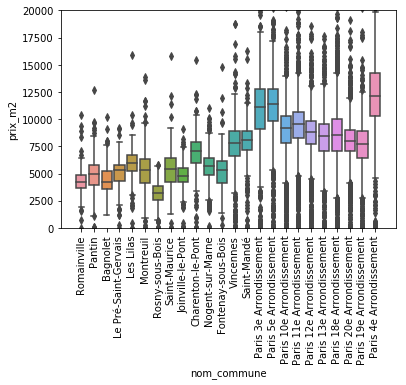

In [42]:
sns.boxplot(x="nom_commune", y="prix_m2", data=df4)
plt.ylim(0, 20000)
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')

## III. Methodology <a name="methodology"></a>

## IV. Analysis <a name="analysis"></a>

## V. Results and Discussion <a name="results"></a>

## VI. Conclusion <a name="conclusion"></a>